# 逻辑回归

In [2]:
# 导入相关包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
# 读取数据集ex2data1.txt
data_path1 = 'ex2data1.txt'
data1 = pd.read_csv(data_path1,header=None,names=['Exam 1', 'Exam 2', 'Admitted'])
data1.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


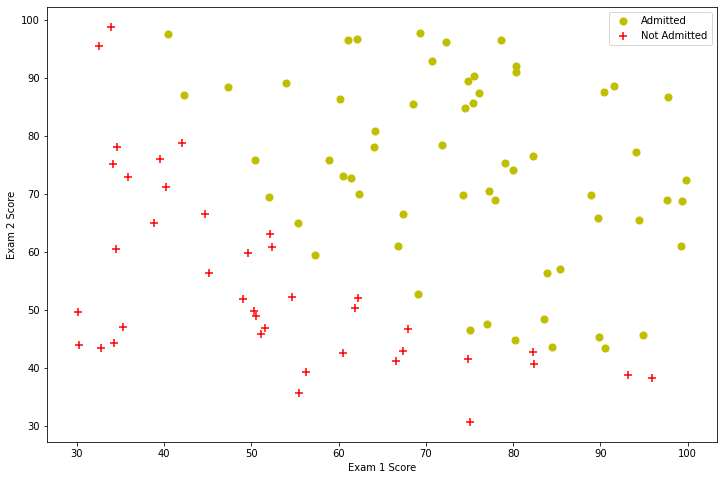

In [4]:
# 将数据集进行可视化
# 区分pos和neg的数据项
pos = data1[data1['Admitted']==1]
neg = data1[data1['Admitted']==0]
# 可视化展示
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['Exam 1'], pos['Exam 2'], s=50, c='y', marker='o', label='Admitted')
ax.scatter(neg['Exam 1'], neg['Exam 2'], s=50, c='r', marker='+', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

# Sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为：
$$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$ 
逻辑回归模型的假设函数： 
	$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

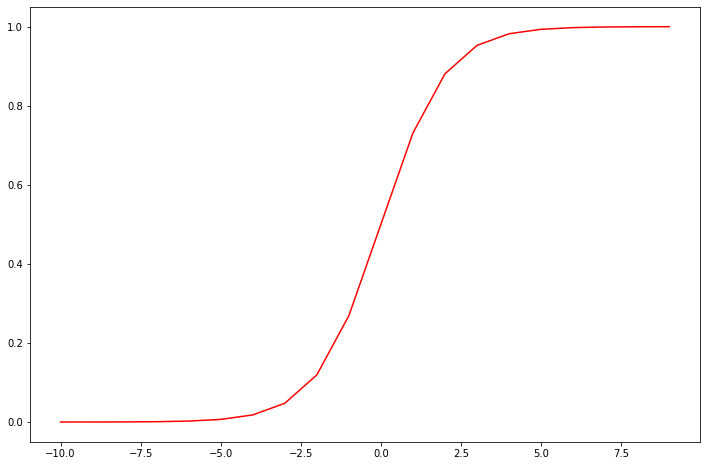

In [6]:
# 检查sigmoid函数
nums = np.arange(-10,10,1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

# 代价函数
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$$

In [7]:
def computeCost(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    m = len(X)
    J = np.sum(np.multiply(-y,np.log(sigmoid(X*theta.T))-np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))))/m
    return J

In [8]:
# 变量设置
data1.insert(0,'Ones',1)
# 设置 X 和 y
cols = data1.shape[1]
X = data1.iloc[:,0:cols-1]
y = data1.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [9]:
# 测试代价函数
computeCost(theta,X,y)

0.41588830833596724

# 梯度下降法（Gradient Descent）
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [10]:
def gradient(theta, X, y):
    "计算梯度步长"
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    temp = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        temp[i] = np.sum(term) / len(X)

    return temp

In [11]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [12]:
# 参数寻优
result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-5.25271347,  0.07915704,  0.01752157]), 85, 4)

In [13]:
computeCost(result[0], X, y)

0.12323596005753794

接下来，我们需要编写一个函数，用我们所学的参数theta来为数据集X输出预测。然后，我们可以使用这个函数来给我们的分类器的训练精度打分。
逻辑回归模型的假设函数： 
	$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$
当${{h}_{\theta }}$大于等于0.5时，预测 y=1,
当${{h}_{\theta }}$小于0.5时，预测 y=0

In [14]:
def predict(theta, X):
    "计算预测值"
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [44]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a,b) in zip(predictions,y)]
accuracy = (sum(map(int,correct)) / len(correct))
print('accuracy={0}'.format(accuracy))

accuracy=0.86


# 正则化逻辑回归

In [16]:
# 读取数据集ex2data2.txt
data_path2 = 'ex2data2.txt'
data2 = pd.read_csv(data_path2, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


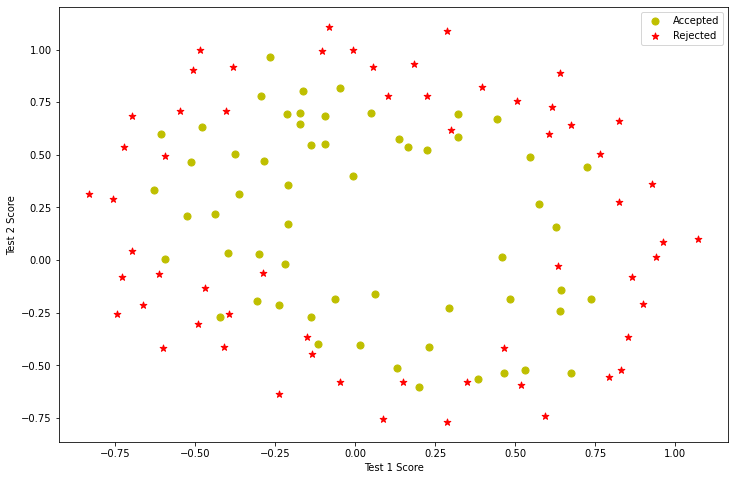

In [17]:
# 将数据集进行可视化
# 区分pos和neg的数据项
pos = data2[data2['Accepted']==1]
neg = data2[data2['Accepted']==0]
# 可视化展示
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['Test 1'], pos['Test 2'], s=50, c='y', marker='o', label='Accepted' )
ax.scatter(neg['Test 1'], neg['Test 2'], s=50, c='r', marker='*', label='Rejected' )
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [18]:
# 创建一组多项式特征
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(i):
        data2[f'F{str(i)}{str(j)}'] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


# 正则化代价函数
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [24]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y, np.log(1-sigmoid(X*theta.T)))
    reg = (learningRate / (2*len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

请注意等式中的"reg" 项。还注意到另外的一个“学习率”参数。这是一种超参数，用来控制正则化项。现在我们需要添加正则化梯度函数：

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a[\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}}] \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$

In [33]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X*theta.T) - y
    
    for i in range(parameters):
        reg = (learningRate / len(X)) * theta[:,i]
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X) if(i==0) else np.sum(term) / len(X) + reg
    return grad

初始化变量

In [22]:
cols2 = data2.shape[1]
X2 = data2.iloc[:,1:cols2]
y2 = data2.iloc[:,:1]
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

learningRate = 1

In [30]:
costReg(theta2,X2,y2,learningRate)

0.6931471805599454

In [34]:
gradientReg(theta2,X2,y2,learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [35]:
# 参数寻优
result2 = opt.fmin_tnc(func=costReg,x0=theta2,fprime=gradientReg,args=(X2, y2, learningRate))
result2

(array([ 0.53010248,  0.29075567, -1.60725764, -0.5821382 ,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264303, -0.9503358 ,
         0.0344085 ]),
 22,
 1)

In [45]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) / len(correct))
print ('accuracy = {0}'.format(accuracy))

accuracy = 0.6610169491525424


In [49]:
# 调用sklearn的线性回归包
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2,y2.ravel())
model.score(X2,y2)

0.6610169491525424